# Problem Statement:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

he chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
 
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps

Lets import some libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Getting the data set

In [212]:
df = pd.read_csv("Glass.csv",sep = '\t')

In [213]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


As the Columns names were not mentioned here, lets re-try the loading dataset with no header option

In [214]:
df = pd.read_csv("Glass.csv",sep='\t', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Lets give naming to the columns as given in the problem statement

In [215]:
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [216]:
df.head(5)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [218]:
df.dtypes

ID                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

There are 214 rows and all are non null values
Only ID and Type of Glass are int64 and remaining all columns are float values

# Checking for Null Values

In [219]:
df.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There are no null values, we can check this through heatmap also

<AxesSubplot:>

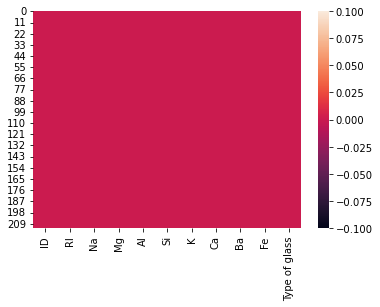

In [220]:
sns.heatmap(df.isnull())

There are no null values in the dataset

Lets check for unique values in each column

In [221]:
df.isnull()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False


In [222]:
for i in df.columns:
    print("Number of unique values in the", {i} ,"column are: ",df[i].nunique())
    print("unique values in the", {i} ,"column are: ",df[i].unique())
    print("////////////////////////////////////////////////////////////////////////////////////////////////////////")

#df['RI'].unique()

Number of unique values in the {'ID'} column are:  214
unique values in the {'ID'} column are:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]
///////////////////////////////////

There are 7 different types of glass indicated in the dataset

Remove the ID Column as its not relevent to the analysis and its like a number to indicate each row

In [223]:
#removing the ID column
df=df.drop(columns="ID", axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Data Visualisation

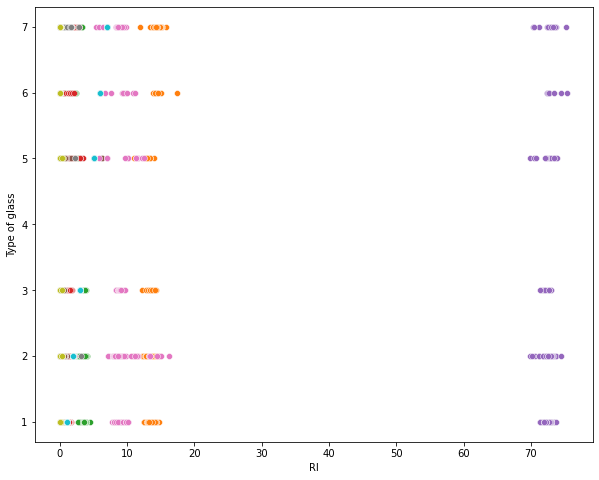

In [224]:
plt.figure(figsize=(10,8))
for i in df.columns:
    sns.scatterplot(x=i, y='Type of glass',data=df)

There are many unique values in the RI column

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


<AxesSubplot:xlabel='Na', ylabel='count'>

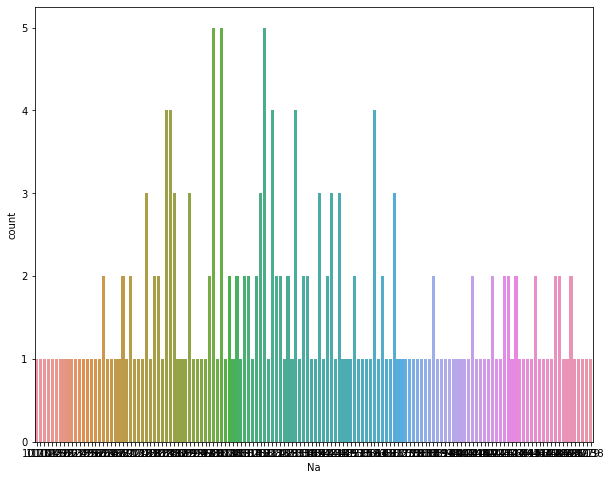

In [225]:
#Count Plot for "Survived" column
plt.figure(figsize=(10,8))
print(df["Type of glass"].value_counts())

sns.countplot("Na",data=df)

There is no data related to 4th type glass

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

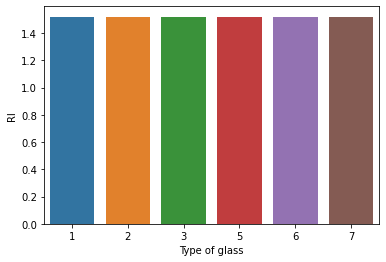

In [226]:
sns.barplot(x='Type of glass', y='RI', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

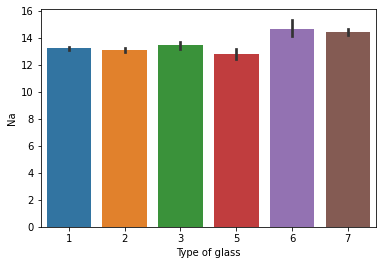

In [227]:
sns.barplot(x='Type of glass', y='Na', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

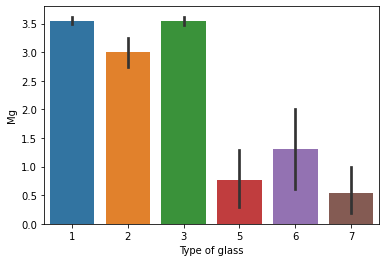

In [228]:
sns.barplot(x='Type of glass', y='Mg', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

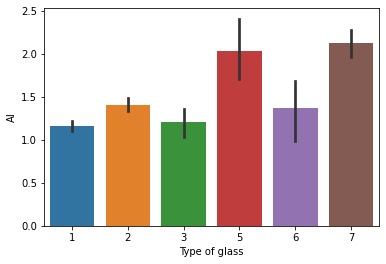

In [229]:
sns.barplot(x='Type of glass', y='Al', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

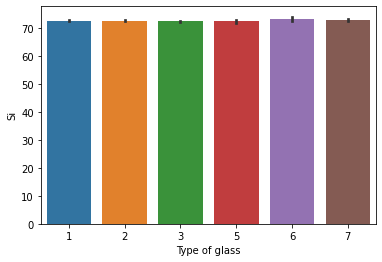

In [230]:
sns.barplot(x='Type of glass', y='Si', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

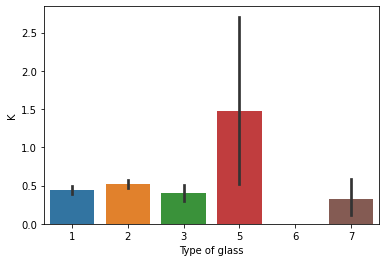

In [231]:
sns.barplot(x='Type of glass', y='K', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

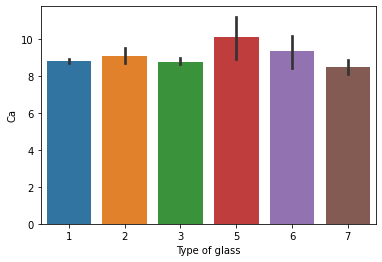

In [232]:
sns.barplot(x='Type of glass', y='Ca', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

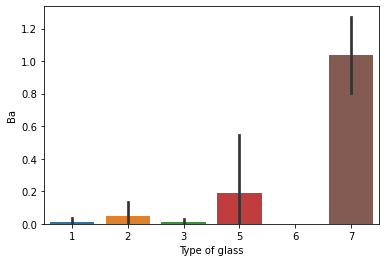

In [233]:
sns.barplot(x='Type of glass', y='Ba', linewidth=3, errcolor='.2', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

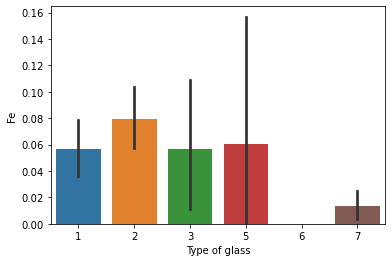

In [234]:
sns.barplot(x='Type of glass', y='Fe', linewidth=3, errcolor='.2', data=df)

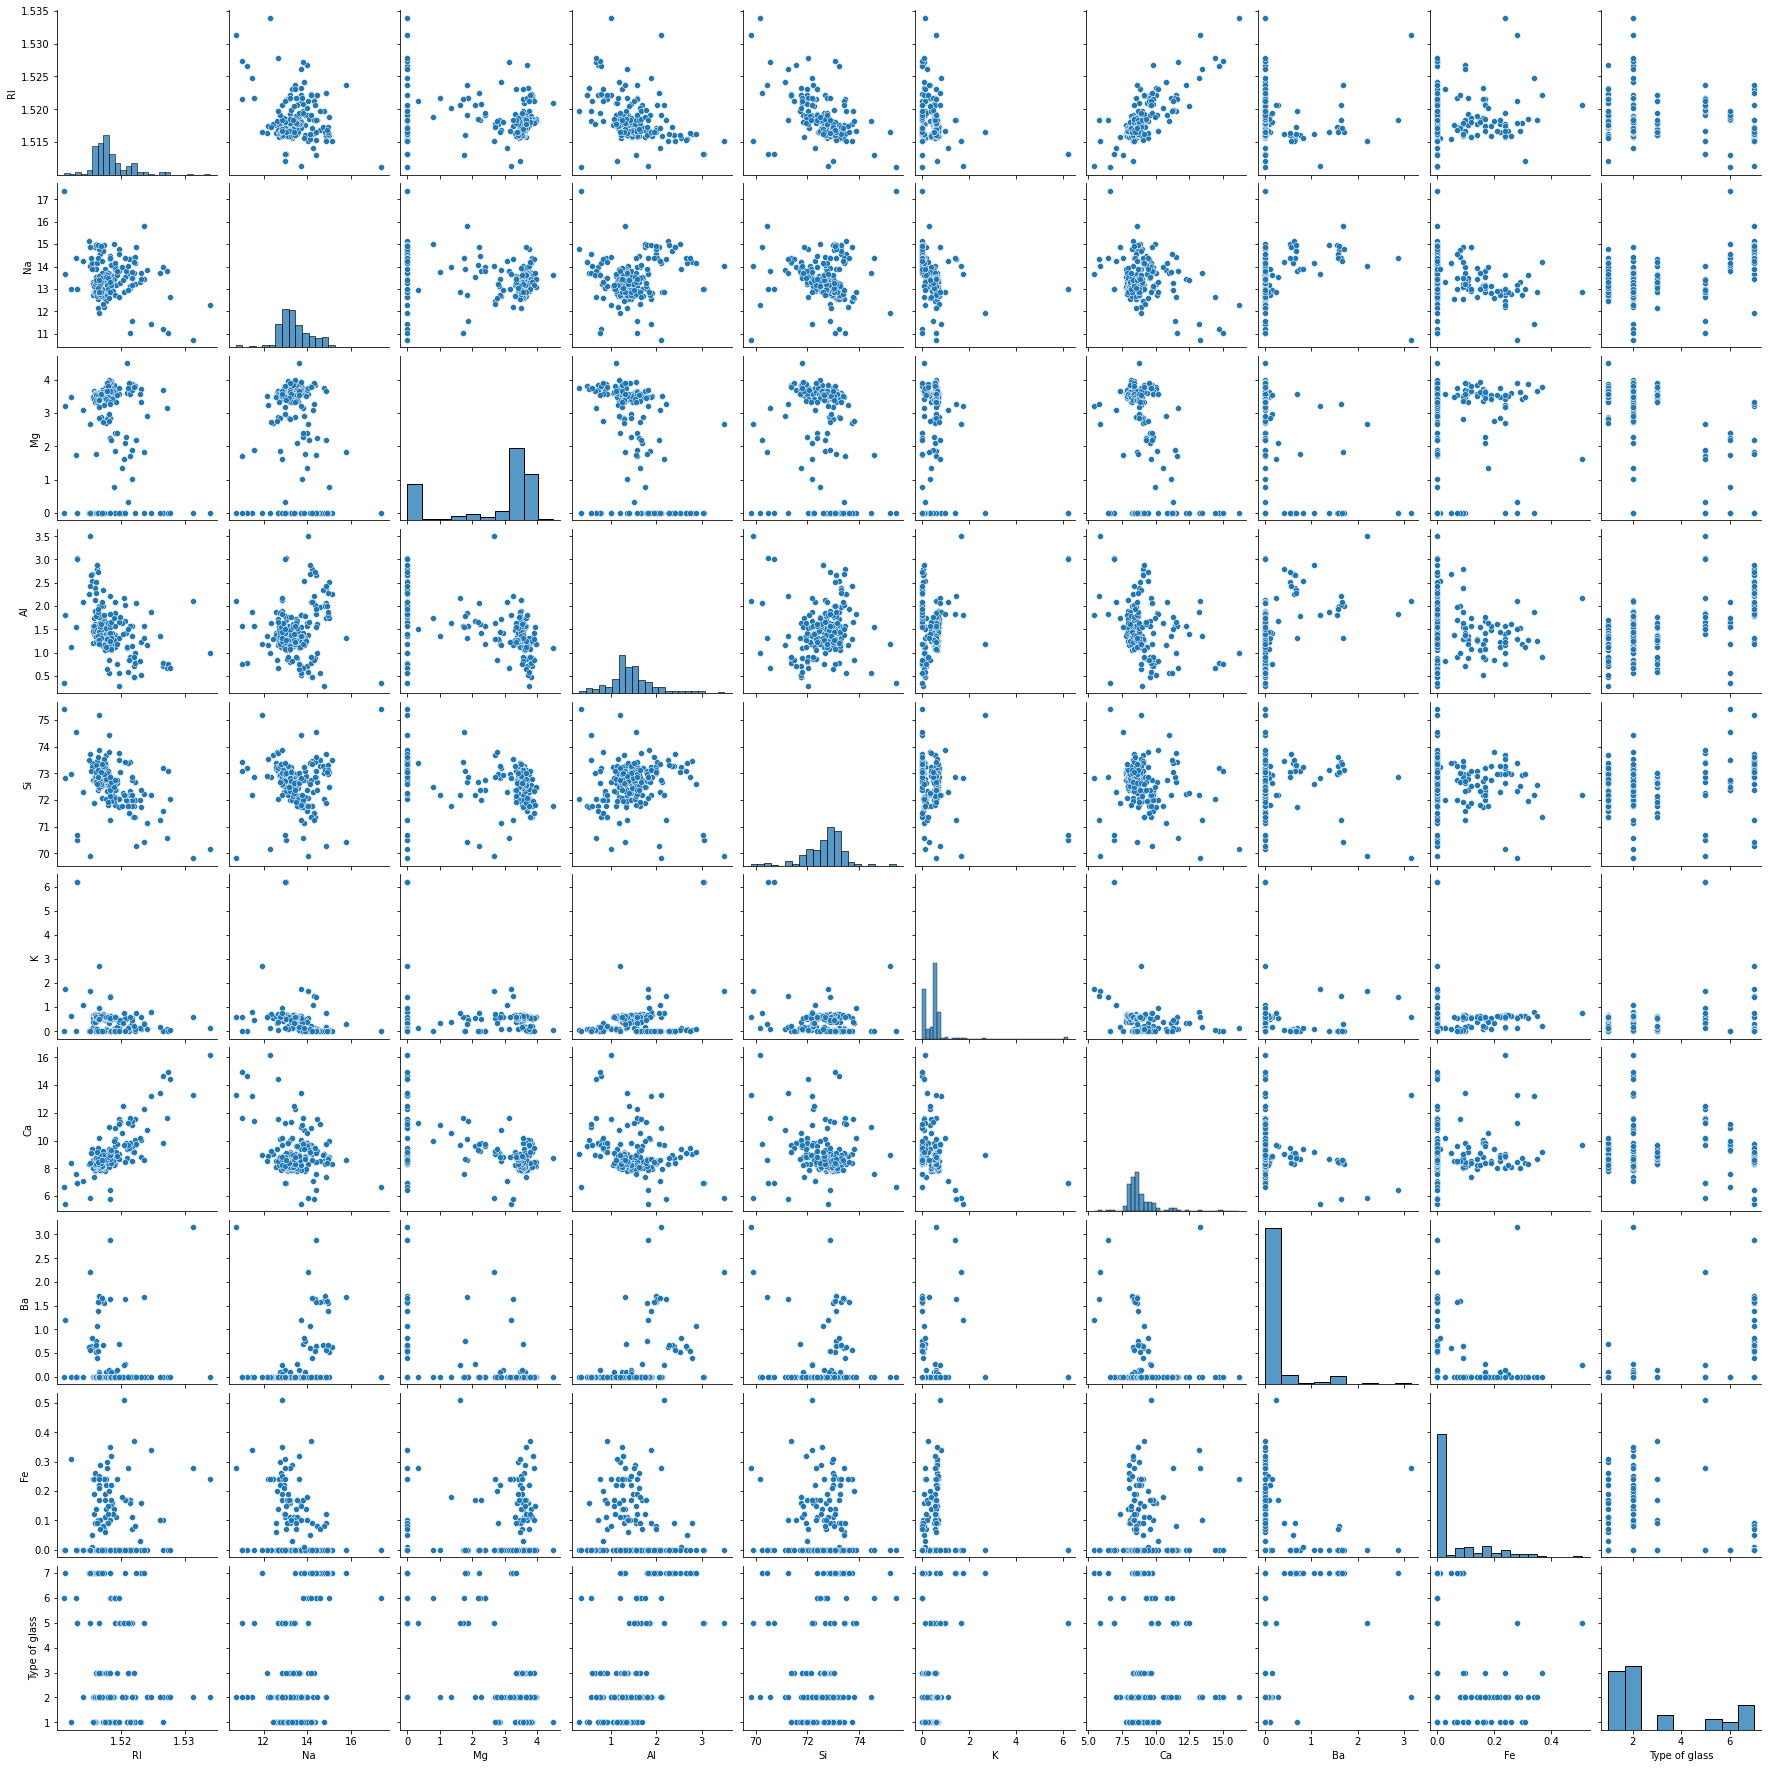

In [235]:
sns.pairplot(df)

<AxesSubplot:xlabel='RI', ylabel='Na'>

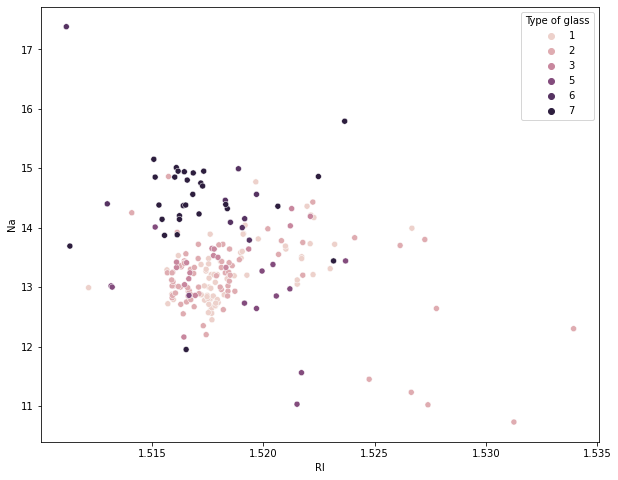

In [236]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='RI',y='Na',hue='Type of glass',data=df)

This showing Somewhat, when Na is high the type of glass is also high ranked

RI is not not having much relation with glass type

<AxesSubplot:xlabel='Mg', ylabel='Al'>

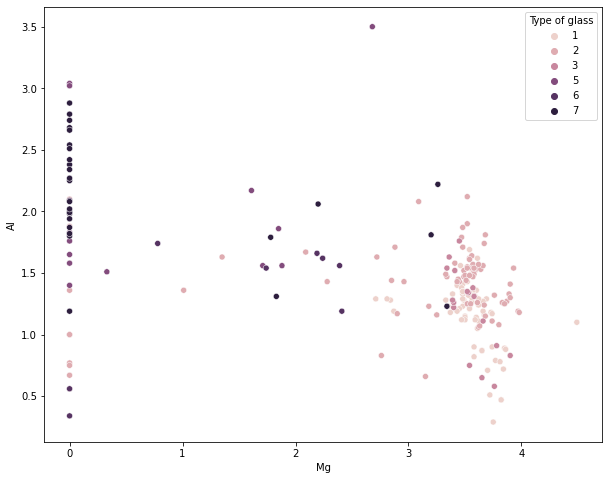

In [237]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Mg',y='Al',hue='Type of glass',data=df)

This showing that higher Al level is having high number of glass type/ rank

Mg levels are low in high rank glass

<AxesSubplot:xlabel='Si', ylabel='K'>

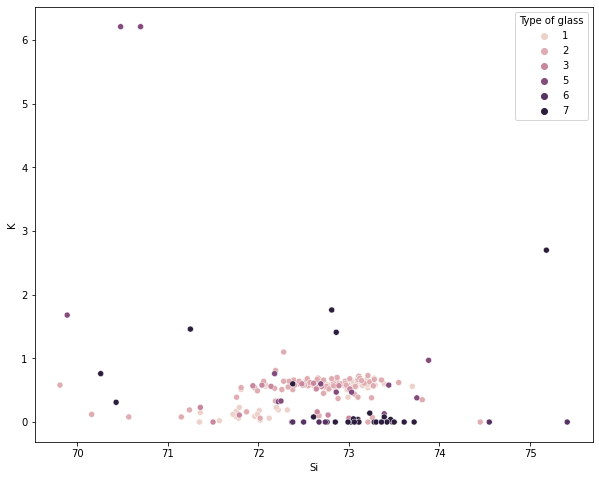

In [238]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Si',y='K',hue='Type of glass',data=df)

ALl types of glass has lower K level

Medium values of si for all types of glass

<AxesSubplot:xlabel='Ca', ylabel='Ba'>

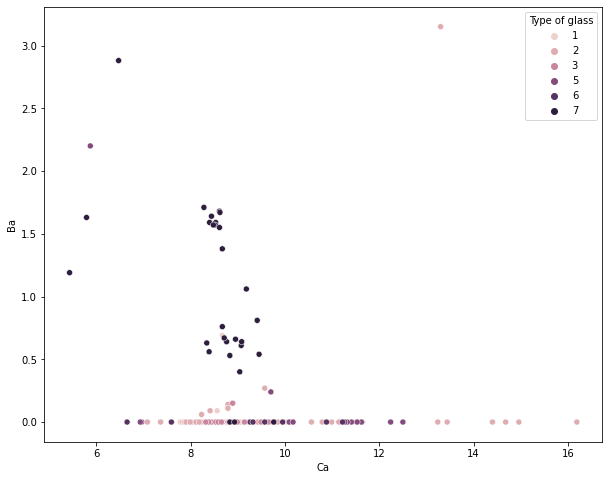

In [239]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ca',y='Ba',hue='Type of glass',data=df)

Ba is high for high rank glass

Ca has moderate effect on glass type, high ca for lower type glass

<AxesSubplot:xlabel='Al', ylabel='Ca'>

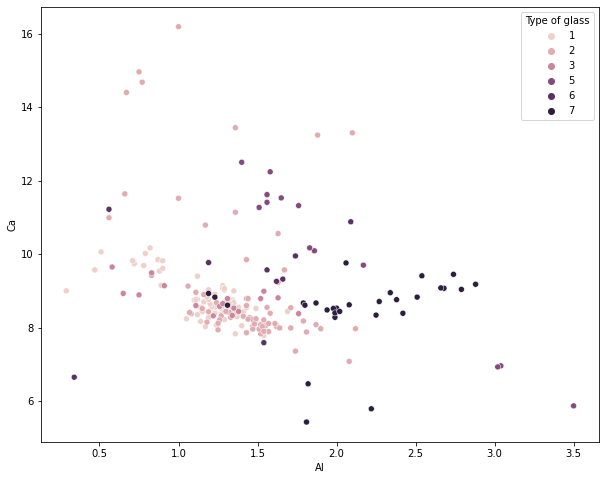

In [240]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Al',y='Ca',hue='Type of glass',data=df)

Al values are high for high type glass

# Correlation

We can check these through correlation also

In [241]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

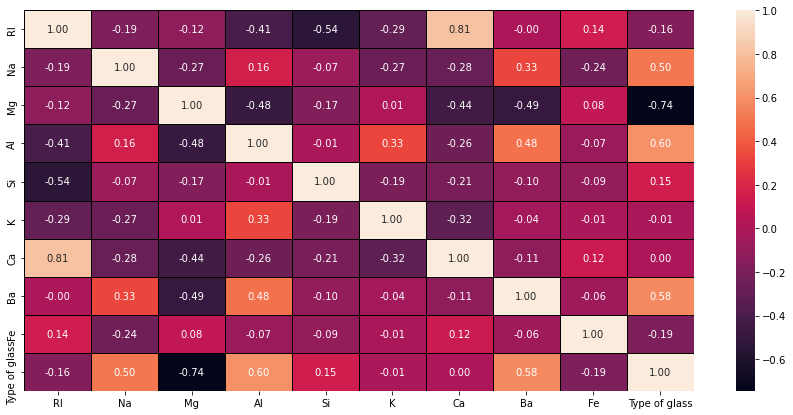

In [242]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

# Outcome of the correlation

Ca, K, Ri, Si are having least correlation with the type of glass


Mg,Na,Al,Ba are highly correlated with type of glass

In [243]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


K has huge difference between max value and 75%, so it may have outliers

Mean and median values almost same for all the values.

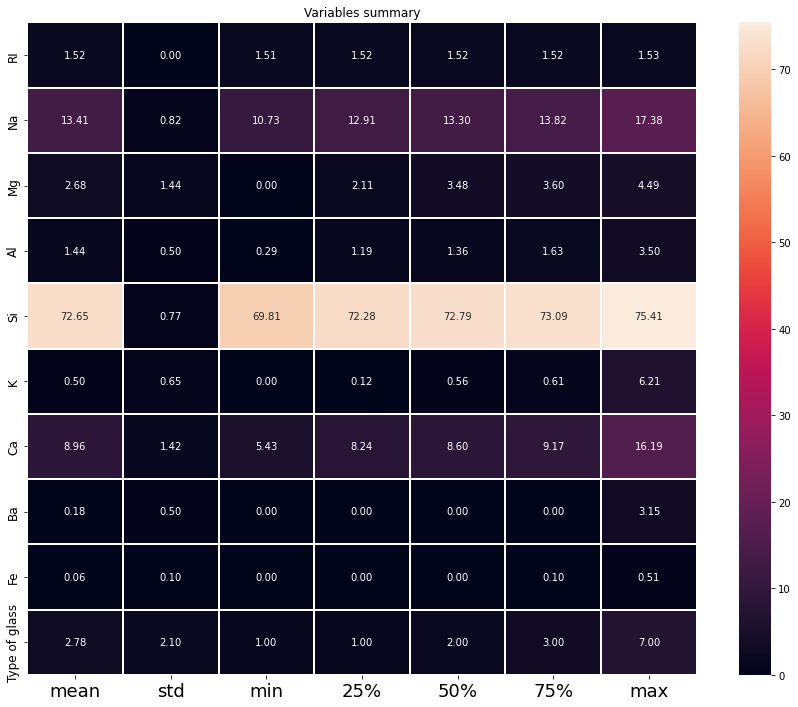

In [244]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Outliers Checking

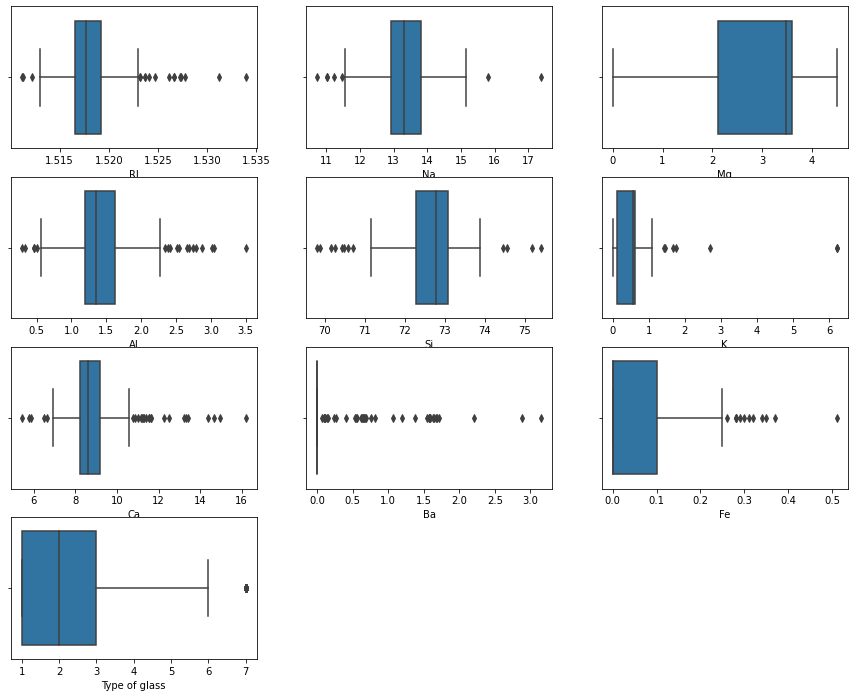

In [245]:
plt.figure(figsize=(15,12))
for i in enumerate(df.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]])

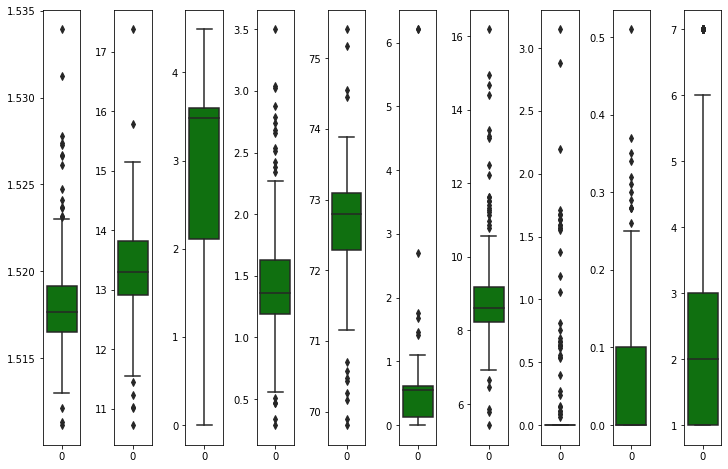

In [246]:
lists=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(lists)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[lists[i]],color='green',orient='v')
    plt.tight_layout()

These boxplots showing that there are ouliers in RI, Na, Si, Al, Ba, Ca, Fe

There are outliers present in every column data.

We need to remove these outliers

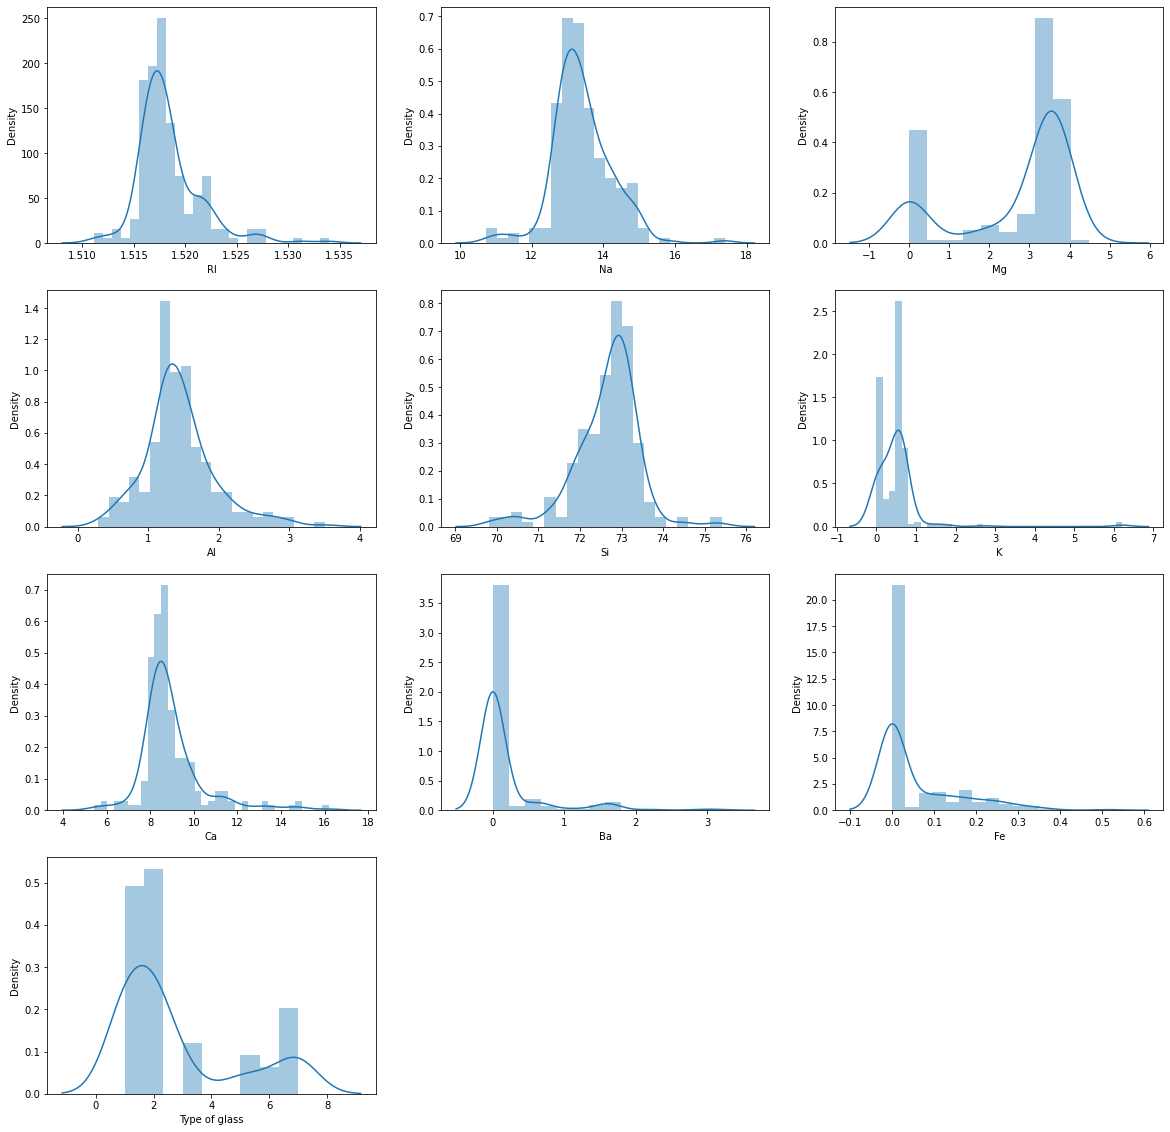

In [247]:
#to check the distribution of the data of each column

plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

Now we have to remove the outliers for removing the skewness from the dataset

In [248]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

# ZSCORE METHOD

In [249]:
from scipy.stats import zscore

# to get the zscore
z=np.abs(zscore(df))

In [250]:
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [251]:
z.iloc[3][3]

0.310993764606817

In [252]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [253]:
#randomly checking the zscore
z.iloc[105][6]

3.01659640155971

In [254]:
#randomly checking the zscore
z.iloc[213][7]

3.0136773864449404

All the indexes got at >3 score are true and we need to remove these outliers from the data set

In [255]:
df.shape

(214, 10)

In [256]:
#Removing the outliers data
df1=df[(z<3).all(axis=1)]

In [257]:
df1.shape

(194, 10)

In [258]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df1.shape)
print("Total Dropped rows:",df.shape[0]-df1.shape[0])

Old DataFrame data in Rows and Column: (214, 10)
New DataFrame data in Rows and Column: (194, 10)
Total Dropped rows: 20


In [259]:
loss_percent=(214-194)/214*100
print(loss_percent,"%")

9.345794392523365 %


After removing the outliers the total rows in the dataset came to 194, so 20 rows removed from dataset. New dataset is df1

Data loss is 9.3%

Now we will try the outliers removal with IQR method, we will opt for less data loss option from IQR and Zscore

# IQR METHOD

In [260]:
from scipy import stats
IQR = stats.iqr(df)
IQR

8.09

In [261]:
Q1 = df.quantile(0.25)
Q3 =  df.quantile(0.75)

In [262]:
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(214, 10)

In [263]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df2.shape)
print("Total Dropped rows:",df.shape[0]-df2.shape[0])

Old DataFrame data in Rows and Column: (214, 10)
New DataFrame data in Rows and Column: (214, 10)
Total Dropped rows: 0


There are no columns removed in IQR method.

We will go with the ZScore method

In [264]:
df1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


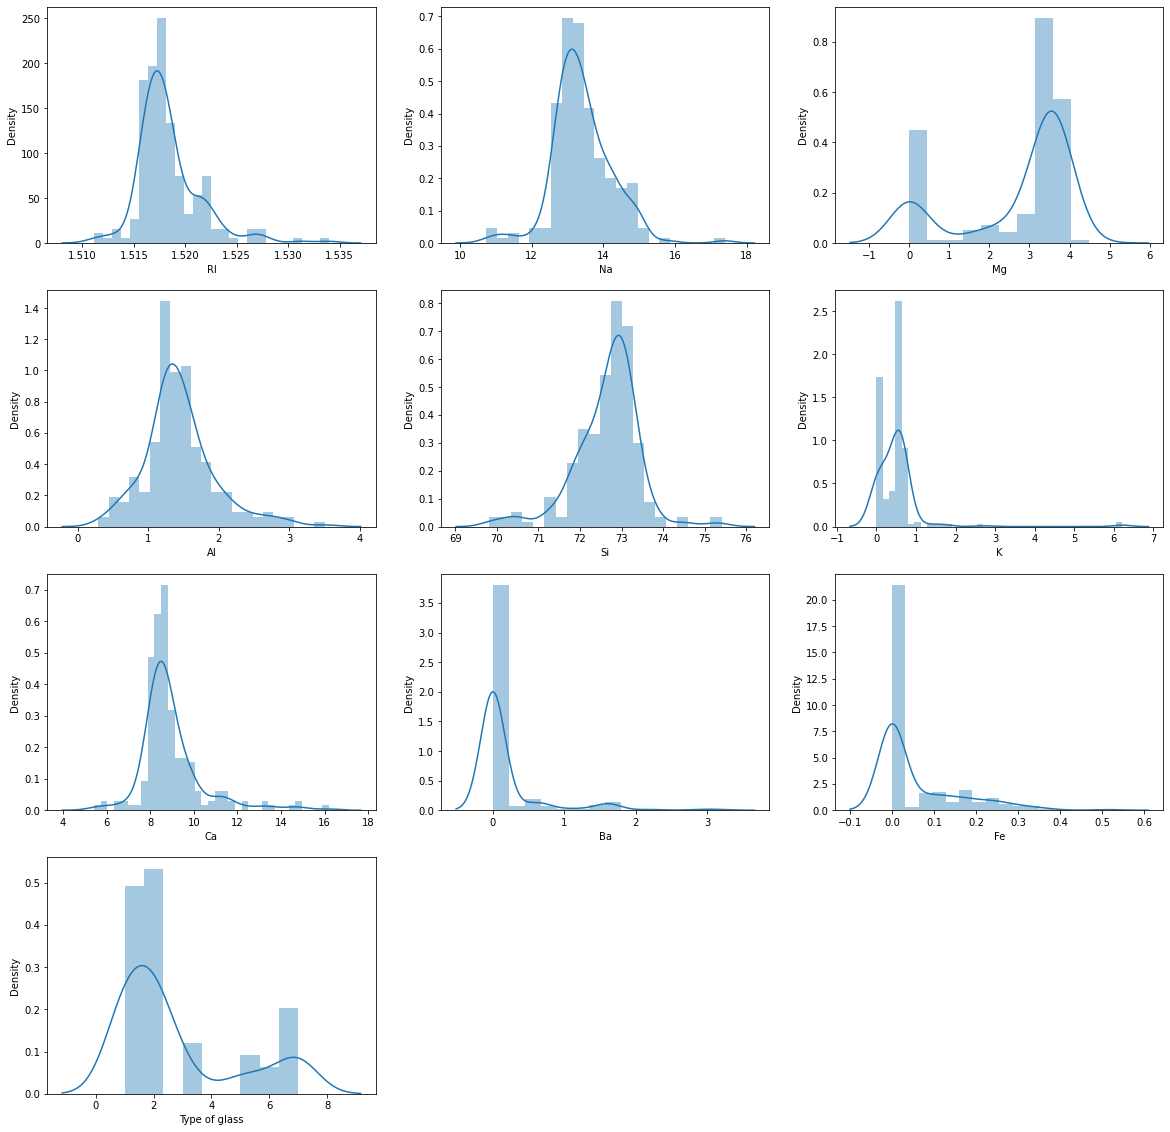

In [265]:
#to check the skewness
plt.figure(figsize=(20,20))
for i in enumerate(df1.columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

In [266]:
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.284007
dtype: float64

# Removing skewness using yeo-johnson method

In [267]:
from sklearn.preprocessing  import power_transform

In [268]:
collist=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
df1[collist]=power_transform(df1[collist],method='yeo-johnson')
df1[collist]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.0,0.375145,2.295067,-0.705895,-1.551856,-1.348170,0.001118,-0.429499,-0.677737
1,0.0,0.732539,0.587338,-0.073256,-0.037058,0.204416,-1.057157,-0.429499,-0.677737
2,0.0,0.214038,0.507711,0.333353,0.425596,-0.114085,-1.119780,-0.429499,-0.677737
3,0.0,-0.268665,0.734829,-0.237973,-0.243294,0.516387,-0.587678,-0.429499,-0.677737
4,0.0,-0.176527,0.619650,-0.358065,0.590922,0.447598,-0.764376,-0.429499,-0.677737
...,...,...,...,...,...,...,...,...,...
208,0.0,1.386487,-1.947674,2.583074,0.173750,-1.585876,0.703768,2.473388,-0.677737
209,0.0,1.078256,-1.947674,2.806651,-0.243294,-1.269960,0.442024,2.497782,-0.677737
210,0.0,2.087829,-1.947674,1.258957,0.553948,-1.585876,-0.381688,2.498738,-0.677737
211,0.0,1.373276,-1.947674,1.316672,1.240457,-1.585876,-0.336778,2.498753,-0.677737


In [269]:
df1.skew()

RI               0.000000
Na              -0.016968
Mg              -1.026009
Al               0.014042
Si               0.036397
K                0.013983
Ca              -0.081738
Ba               1.971225
Fe               0.858856
Type of glass    1.284007
dtype: float64

Skewness removal with power transform is not applied on Type of Glass, as it is our target variable

# Checking skewness after removal through data visualization using distplot

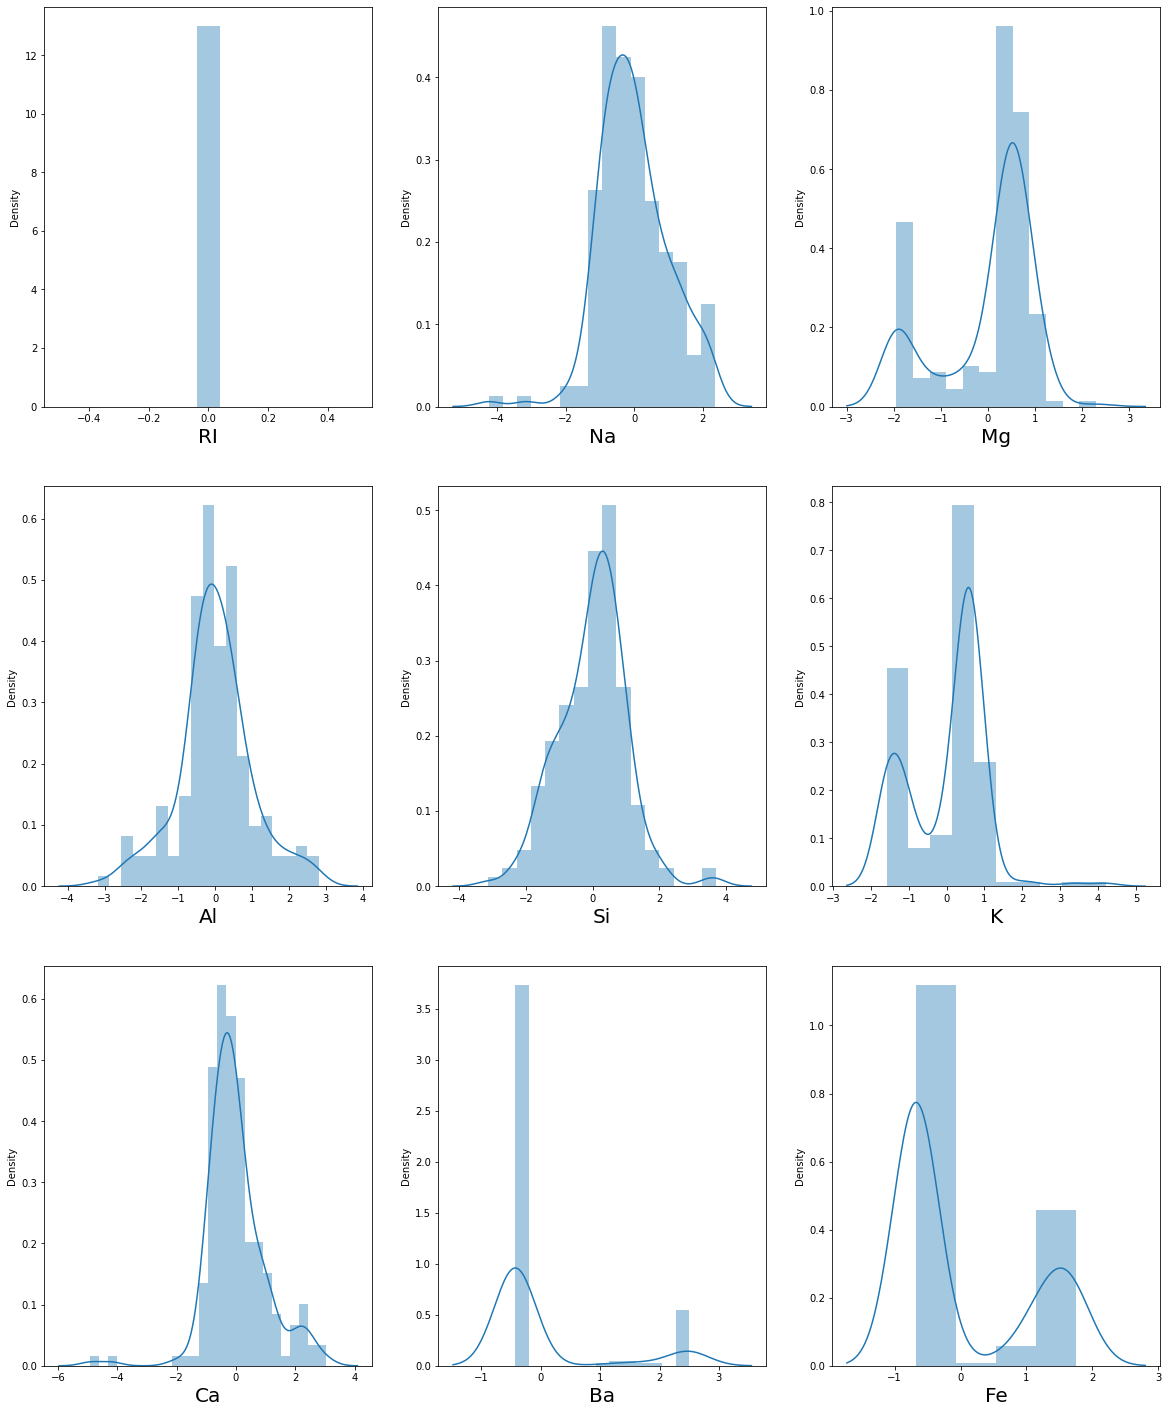

In [270]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Skewness got removed when compared to the old data

In [271]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.0,0.375145,2.295067,-0.705895,-1.551856,-1.348170,0.001118,-0.429499,-0.677737,1
1,0.0,0.732539,0.587338,-0.073256,-0.037058,0.204416,-1.057157,-0.429499,-0.677737,1
2,0.0,0.214038,0.507711,0.333353,0.425596,-0.114085,-1.119780,-0.429499,-0.677737,1
3,0.0,-0.268665,0.734829,-0.237973,-0.243294,0.516387,-0.587678,-0.429499,-0.677737,1
4,0.0,-0.176527,0.619650,-0.358065,0.590922,0.447598,-0.764376,-0.429499,-0.677737,1
...,...,...,...,...,...,...,...,...,...,...
208,0.0,1.386487,-1.947674,2.583074,0.173750,-1.585876,0.703768,2.473388,-0.677737,7
209,0.0,1.078256,-1.947674,2.806651,-0.243294,-1.269960,0.442024,2.497782,-0.677737,7
210,0.0,2.087829,-1.947674,1.258957,0.553948,-1.585876,-0.381688,2.498738,-0.677737,7
211,0.0,1.373276,-1.947674,1.316672,1.240457,-1.585876,-0.336778,2.498753,-0.677737,7


In [272]:
#Tranforming the Type of glasss column as 0(From 1 to 4) and 1(from 5 to 8)
df1.loc[(df1['Type of glass'] < 5.0),'Type of glass']=0
df1.loc[(df1['Type of glass'] >=5.0),'Type of glass']=1

# SCaling the data

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
#dividing the data into inputs and target as X, Y
x=df1.drop(['Type of glass'],axis=1)
y=df1['Type of glass']

In [275]:
x.shape

(194, 9)

In [276]:
y.shape

(194,)

In [277]:
x=sc.fit_transform(x)
x

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [278]:
y.value_counts()

0    154
1     40
Name: Type of glass, dtype: int64

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

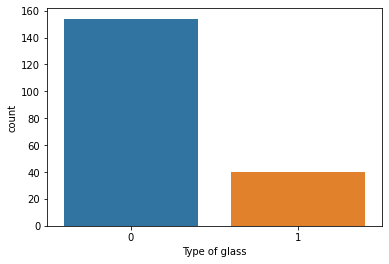

In [279]:
#checking through visualization also
sns.countplot(y)

This is having imbalaced data, so we will use SMOTE technique to resampling

# SMOTE for balacing the data set

In [280]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [281]:
y.value_counts()

0    154
1    154
Name: Type of glass, dtype: int64

Now the data is balanced

In [282]:
x.shape

(308, 9)

In [283]:
y.shape

(308,)

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

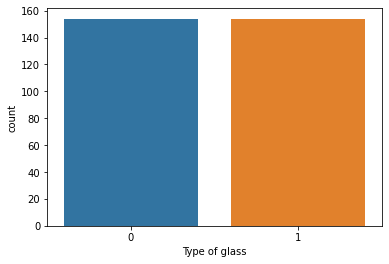

In [284]:
#checking through visualization also
sns.countplot(y)

We will use binary classification models as the target is binary

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score

# Splitting the DataSet

In [286]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs very well")
        print("At random state: ",i)
        print("Training Accuracy is: ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy Score is: ",accuracy_score(y_test,pred_test)*100)

At random state 323 the model performs very well
At random state:  323
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355
At random state 358 the model performs very well
At random state:  358
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355
At random state 423 the model performs very well
At random state:  423
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355
At random state 683 the model performs very well
At random state:  683
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355
At random state 824 the model performs very well
At random state:  824
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355
At random state 989 the model performs very well
At random state:  989
Training Accuracy is:  98.3739837398374
Testing accuracy Score is:  98.38709677419355


Here at all the above mentioned random states the accuracy scores are equal, so we can slelect any random state

Here I am selecting 989 for randdom state

In [288]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=989)

In [289]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49        32
           1       0.48      0.53      0.51        30

    accuracy                           0.50        62
   macro avg       0.50      0.50      0.50        62
weighted avg       0.50      0.50      0.50        62



# Cross validation score for Logistic Regression

In [290]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(y_test,pred_lr)
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print("At CV: ",i)
    print("cross validation score is: ",lsc*100)
    print("Accuracy score is: ",lss*100)
    print("\n")

At CV:  2
cross validation score is:  94.8051948051948
Accuracy score is:  98.38709677419355


At CV:  3
cross validation score is:  94.79345136112697
Accuracy score is:  98.38709677419355


At CV:  4
cross validation score is:  95.45454545454545
Accuracy score is:  98.38709677419355


At CV:  5
cross validation score is:  96.0867265996827
Accuracy score is:  98.38709677419355


At CV:  6
cross validation score is:  94.79009552538963
Accuracy score is:  98.38709677419355


At CV:  7
cross validation score is:  95.45454545454547
Accuracy score is:  98.38709677419355


At CV:  8
cross validation score is:  95.75742240215925
Accuracy score is:  98.38709677419355


At CV:  9
cross validation score is:  95.13538748832866
Accuracy score is:  98.38709677419355




At CV= 4/7 the cv score and the accuarcy score differences are minimum we will take Cv at 4

In [291]:
lsscore_selected= cross_val_score(lr,x,y,cv=4).mean()
print("the CV score is: ",lsscore_selected,"\n The accuracy score is: ",lss)

the CV score is:  0.9545454545454545 
 The accuracy score is:  0.9838709677419355


# Trying More classification techniques

# RAndom Forest Classifier

In [292]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC = RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9838709677419355
[[32  0]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        30

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [293]:
score = cross_val_score(RFC,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_RFC)-score.mean())

[0.98701299 1.         0.96103896 0.92207792]
0.9675324675324675
Difference between cross val score and accuracy is :  0.016338500209468032


# Support Vector Machine

In [294]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.9838709677419355
[[32  0]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        30

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [295]:
score = cross_val_score(svc,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_svc)-score.mean())

[0.98701299 1.         0.97402597 0.94805195]
0.9772727272727272
Difference between cross val score and accuracy is :  0.006598240469208316


# GradientBoostingClassifier

In [296]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.9838709677419355
[[32  0]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        30

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [297]:
score = cross_val_score(GB,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_GB)-score.mean())

[0.97402597 0.98701299 0.93506494 0.92207792]
0.9545454545454546
Difference between cross val score and accuracy is :  0.029325513196480912


# ExtraTreesClassifier

In [298]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET = ET.predict(x_test)
print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.9838709677419355
[[32  0]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        30

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [299]:
score = cross_val_score(ET,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_ET)-score.mean())

[0.98701299 0.97402597 0.97402597 0.94805195]
0.9707792207792209
Difference between cross val score and accuracy is :  0.013091746962714645


Till Now the best model is Support Vector Machine 

We will continue with the SVM Model

# Hyper Parameter Tuning

In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [301]:
svc = SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

gcv=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
gcv.fit(x_train,y_train)
gcv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [302]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9838709677419355

# ROC-AUC Curve

In [303]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test,gcv_pred)
auc = roc_auc_score(y_test,gcv_pred)

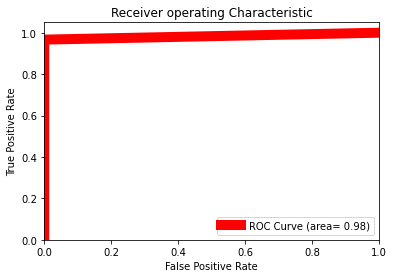

In [304]:
plt.figure()
plt.plot(fpr,tpr,color="red",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving the Model

In [305]:
import joblib
joblib.dump(gcv.best_estimator_,'Glass.obj')

['Glass.obj']

# Loading the saved Model

In [306]:
import joblib
Loaded_Model = joblib.load(open('Glass.obj','rb'))
result = Loaded_Model.score(x_test,y_test)
print(result*100)

98.38709677419355


In [307]:
conclusion = pd.DataFrame([Loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
Predicted,0,0,0,0,0,1,1,1,0,0,...,0,1,0,1,1,0,0,1,1,0
Original,0,0,0,0,0,1,1,1,0,0,...,0,1,0,1,1,0,0,1,1,0
